# Import Library

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load Citra

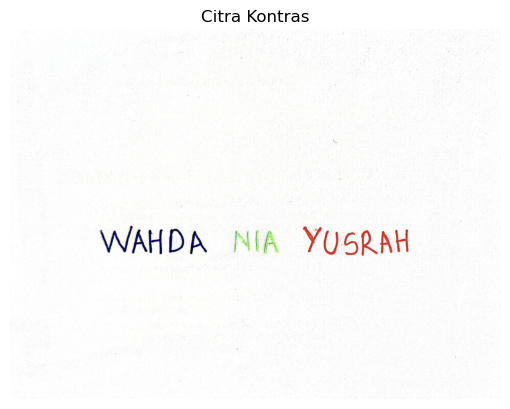

In [58]:
img = cv2.imread('nama.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(img_rgb)
plt.title('Citra Kontras')
plt.axis('off')
plt.show()

# Deteksi Warna

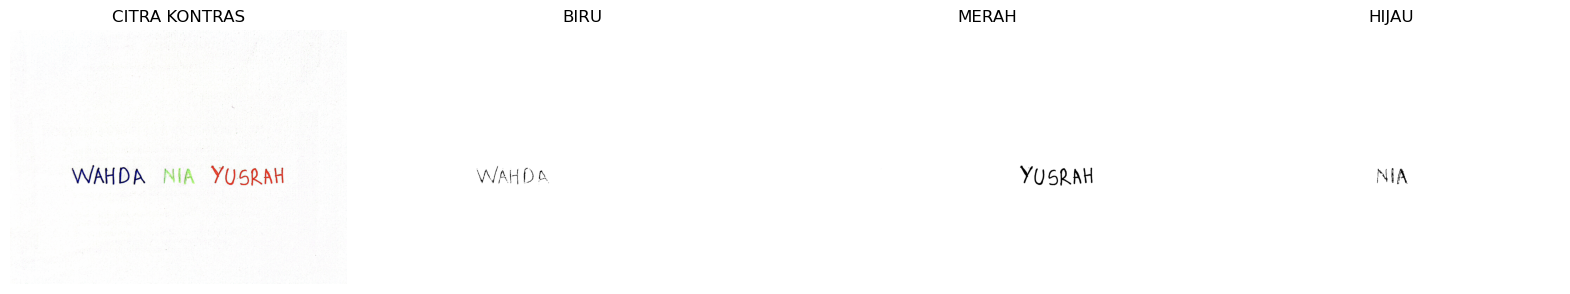

In [63]:
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

def mask_to_white_bg(mask):
    result = np.ones_like(img_rgb) * 255
    result[mask > 0] = [0, 0, 0]
    return result

blue_on_white = mask_to_white_bg(mask_blue)
red_on_white = mask_to_white_bg(mask_red)
green_on_white = mask_to_white_bg(mask_green)

fig, axs = plt.subplots(1, 4, figsize=(20, 6))
axs[0].imshow(img_rgb)
axs[0].set_title('CITRA KONTRAS')
axs[1].imshow(blue_on_white)
axs[1].set_title('BIRU')
axs[2].imshow(red_on_white)
axs[2].set_title('MERAH')
axs[3].imshow(green_on_white)
axs[3].set_title('HIJAU')
for ax in axs:
    ax.axis('off')
plt.show()

# Histogram Setiap Gambar

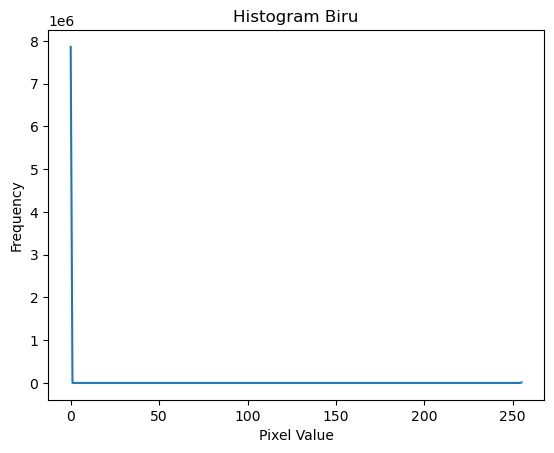

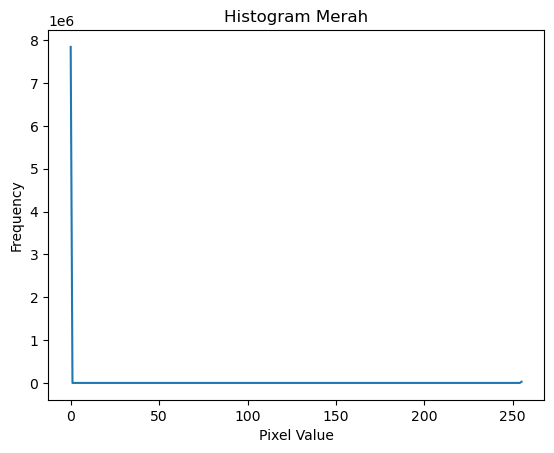

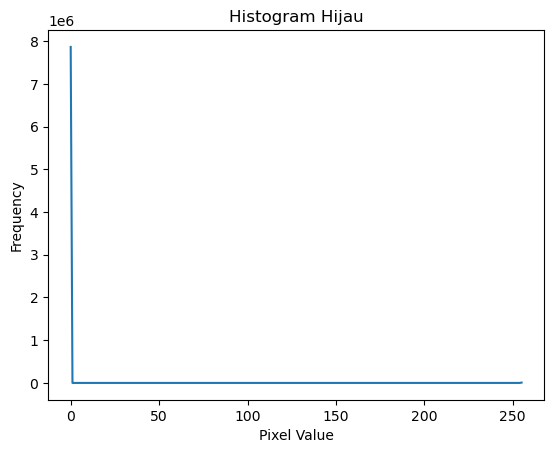

In [65]:
def plot_histogram(mask, title):
    hist = cv2.calcHist([mask], [0], None, [256], [0,256])
    plt.plot(hist)
    plt.title(f'Histogram {title}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(mask_blue, 'Biru')
plot_histogram(mask_red, 'Merah')
plot_histogram(mask_green, 'Hijau')


# Ambang Batas

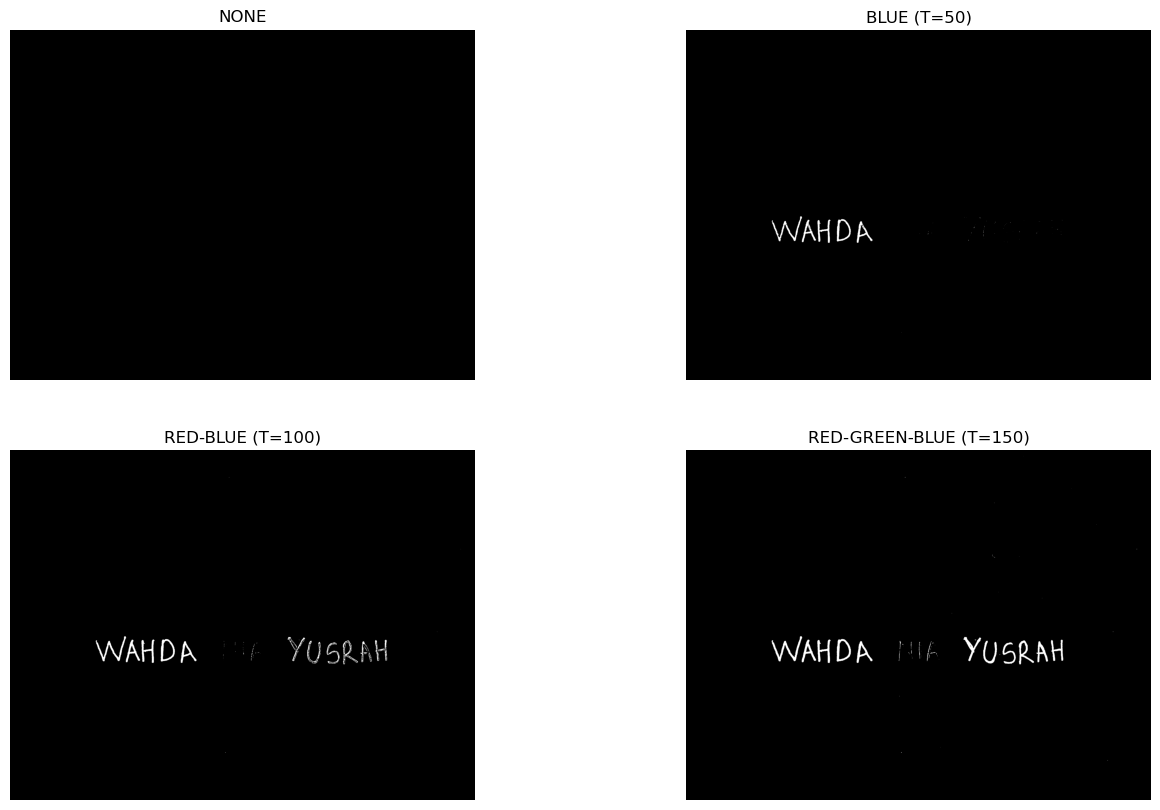

Ambang batas yang digunakan (dari kecil ke besar): [50, 100, 150]


In [52]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresholds = [50, 100, 150]

none_img = np.zeros_like(img_gray)

_, blue_img = cv2.threshold(img_gray, thresholds[0], 255, cv2.THRESH_BINARY_INV)

_, red_blue_img = cv2.threshold(img_gray, thresholds[1], 255, cv2.THRESH_BINARY_INV)

_, rgb_img = cv2.threshold(img_gray, thresholds[2], 255, cv2.THRESH_BINARY_INV)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs[0,0].imshow(none_img, cmap='gray')
axs[0,0].set_title('NONE')
axs[0,1].imshow(blue_img, cmap='gray')
axs[0,1].set_title('BLUE (T={})'.format(thresholds[0]))
axs[1,0].imshow(red_blue_img, cmap='gray')
axs[1,0].set_title('RED-BLUE (T={})'.format(thresholds[1]))
axs[1,1].imshow(rgb_img, cmap='gray')
axs[1,1].set_title('RED-GREEN-BLUE (T={})'.format(thresholds[2]))
for ax in axs.flatten():
    ax.axis('off')
plt.show()

print("Ambang batas yang digunakan (dari kecil ke besar):", thresholds)
